In [35]:
import pandas as pd
import sys
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, train_test_split, learning_curve

# First, I define the column names for the dataset to use
names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

# I read the dataset and store it in a dataframe from pandas
df = pd.read_csv('winequality-red 2.csv',names=names , sep=';')

# I select alcohol and ph as my independent variables
x = df[['alcohol','pH']]
# The wine quality will be the dependent variable, the one to be predicted
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

# we create aa linear regression model using the sklearn library
r = linear_model.LinearRegression()
r.fit(x, y)

# now we print out model values 
print('Intercept: ', r.intercept_)
print('Coefficients: ', r.coef_)

print ("comparing prediction and regular values")
predictions = r.predict(x_test)
error = mean_squared_error(y_test, predictions)

print ("The prediction error is: ", error) 


Intercept:  4.425814068022737
Coefficients:  [ 0.38616699 -0.85010793]
comparing prediction and regular values
The prediction error is:  0.5519955239999369


This is the model that I create at fisrt. it predicts the value of the wine quality based on the ph and the alcohol ammounts-

To create this model, i divided the dataset into two different sets. the first one is for training the model, and the second one is for testing.

this division helps to identify different situations, such as underfitting and overfitting.

In [36]:
train_predict = r.predict(x_train)
test_predict = r.predict(x_test)

print("El MSE de train es ", mean_squared_error( y_train, train_predict))            
print("El MSE de test es ", mean_squared_error( y_test, test_predict))


El MSE de train es  0.45983067028928915
El MSE de test es  0.5519955239999369


Here we can observe that we have found a model that has a relatively low error. 

The difference between both errors is not so big, but we can see that we have a 20% difference between the train error and the test one. This can indicate that we have a case of light overfitting, as the model could be memorizing the values from the training dataset. 

This also indicates that we have a medium strength bias as the model has adjusted itself to match the values from training, having a displacement when comaring them to the testing data

In [ ]:
#Now I will validate the model using cross validation

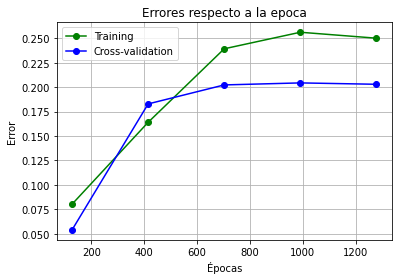

In [37]:
train_sizes, train_scores, test_scores = learning_curve(r, x, y)
# Mean and STD of the train scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Mean and STD of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.title("Errores respecto a la epoca")
plt.plot(train_sizes, train_mean, "o-", color="g", label='Training')

plt.plot(train_sizes, test_mean, "o-", color="b", label='Cross-validation')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend(loc="best")
plt.grid()
plt.show()


Here we can see that the distance between both errors is not that big. However, we want it to be as small as possible, so we will adjust our model to avoid this overfitting

In [38]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=5)

# we create aa linear regression model using the sklearn library
r2 = linear_model.LinearRegression()
r2.fit(x, y)

# now we print out model values 
print('Intercept: ', r2.intercept_)
print('Coefficients: ', r2.coef_)

print ("comparing prediction and regular values")
predictions2 = r2.predict(x_test2)
error2 = mean_squared_error(y_test2, predictions2)

print ("The prediction error is: ", error2) 


Intercept:  4.425814068022737
Coefficients:  [ 0.38616699 -0.85010793]
comparing prediction and regular values
The prediction error is:  0.5003862852120513


This second model has a better distribution of the dataset. This is considered as an adjustment to an hyper parameter. Now we will get a different modelation with slightly different coeficcients and intercept.

In [39]:
train_predict2 = r2.predict(x_train2)
test_predict2 = r2.predict(x_test2)

print("El MSE de train es ", mean_squared_error( y_train2, train_predict2))            
print("El MSE de test es ", mean_squared_error( y_test2, test_predict2))

El MSE de train es  0.478895880123015
El MSE de test es  0.5003862852120513


Now we can see that the difference between both errors has been reduced significantly. This means that we have solved our overfitting issue, and it also tells us that we have a case with a low bias and a low variance. being the low bias observed with the small change in the error when modifing the dataset, and the low variance is observed with the small magnitude of the error.

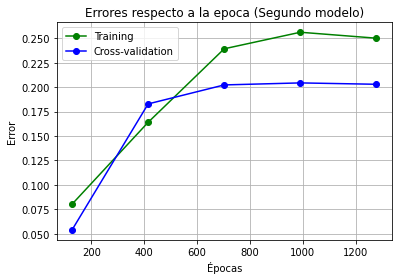

In [40]:
train_sizes2, train_scores2, test_scores2 = learning_curve(r2, x, y)
train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)


plt.title("Errores respecto a la epoca (Segundo modelo)")
plt.plot(train_sizes2, train_mean, "o-", color="g", label='Training')

plt.plot(train_sizes2, test_mean, "o-", color="b", label='Cross-validation')
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend(loc="best")
plt.grid()
plt.show()

Now we can see that the difference between the training errors and the validation ones are also smaller. Something interesting to observe is that we find that the errors are almost the same in the epoch #400, and in epoch 500 they are equal. 

This could also be an indicator of a slight remainance of overfitting that could be solved by delimiting the epochs to 500, so this could be a future improvement to be implemented.